# Parte 2: Nuevos Insights predictivos para tu set de Datos


Usando el dataset del Taller N°1 y/o codificado del Taller N°2, deberá clusterización con Kmeans que permita analizar conglomerados en su conjunto de datos de manera que pueda encontrar nuevos insights que sirvan como contribución en su próxima publicación.

In [17]:
from google.colab import files
import pandas as pd

# Subir el archivo
uploaded = files.upload()

# Detectar nombre del archivo
filename = next(iter(uploaded))

# Leer el CSV usando ; como separador
df_encoded = pd.read_csv(filename, sep=';')

# Mostrar las primeras filas como tabla
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas si son muchas
df_encoded.head()



Saving df_encoded.csv to df_encoded (2).csv


Total Waste_Bajo  Total Waste_Medio  Total Waste_Alto  Total Waste_Extremo  \
0                 0                  1                 0                    0   
1                 1                  0                 0                    0   
2                 1                  0                 0                    0   
3                 0                  0                 0                    1   
4                 0                  0                 1                    0   

   Economic Loss_Bajo  Economic Loss_Medio  Economic Loss_Alto  \
0                   0                    1                   0   
1                   1                    0                   0   
2                   1                    0                   0   
3                   0                    0                   0   
4                   0                    0                   1   

   Economic Loss_Extremo  Avg Waste per Capita_Bajo  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      1                          0   
4                      0                          0   

   Avg Waste per Capita_Medio  Avg Waste per Capita_Alto  \
0                           1                          0   
1                           0                          0   
2                           0                          0   
3                           0                          1   
4                           1                          0   

   Avg Waste per Capita_Extremo  Household Waste_Bajo  Household Waste_Medio  \
0                             0                     0                      0   
1                             1                     1                      0   
2                             1                     0                      1   
3                             0                     1                      0   
4                             0                     1                      0   

   Household Waste_Alto  Household Waste_Extremo  Country_Australia  \
0                     1                        0                  1   
1                     0                        0                  0   
2                     0                        0                  0   
3                     0                        0                  0   
4                     0                        0                  0   

   Country_Brazil  Country_Canada  Country_China  Country_France  \
0               0               0              0               0   
1               0               0              0               0   
2               0               0              0               0   
3               0               0              0               1   
4               0               0              0               1   

   Country_Germany  Country_India  Country_Indonesia  Country_Italy  \
0                0              0                  0              0   
1                0              0                  1              0   
2                1              0                  0              0   
3                0              0                  0              0   
4                0              0                  0              0   

   Country_Japan  Country_Mexico  Country_Russia  Country_Saudi Arabia  \
0              0               0               0                     0   
1              0               0               0                     0   
2              0               0               0                     0   
3              0               0               0                     0   
4              0               0               0                     0   

   Country_South Africa  Country_South Korea  Country_Spain  Country_Turkey  \
0                     0                    0              0               0   
1                     0                    0              0               0   
2

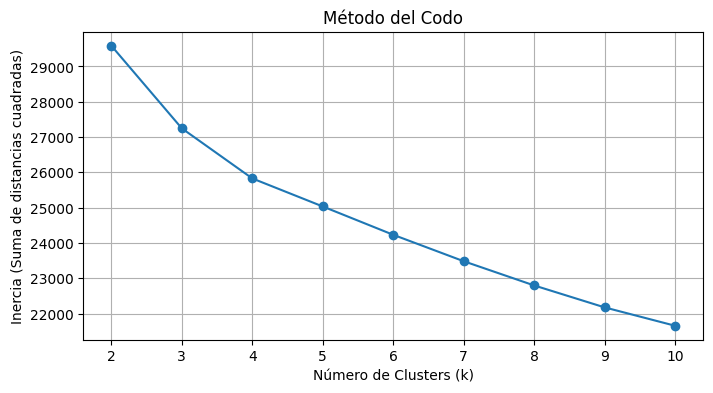

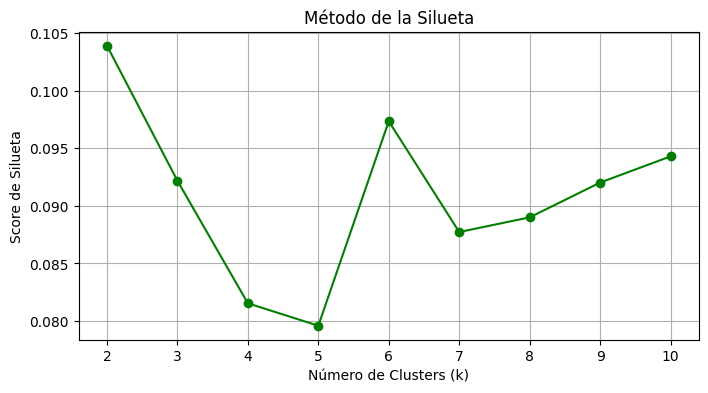

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Escalar solo Year_Label y Population_Label
df_scaled = df_encoded.copy()
scaler = StandardScaler()
df_scaled[['Year_Label', 'Population_Label']] = scaler.fit_transform(df_scaled[['Year_Label', 'Population_Label']])

# 2. Crear matriz para clustering
X = df_scaled.values

# 3. Método del Codo
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.grid(True)
plt.show()

# 4. Método del Puntaje de Silueta
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Método de la Silueta")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Score de Silueta")
plt.grid(True)
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Escalar solo Year_Label y Population_Label
df_scaled = df_encoded.copy()
scaler = StandardScaler()
df_scaled[['Year_Label', 'Population_Label']] = scaler.fit_transform(df_scaled[['Year_Label', 'Population_Label']])

# 2. Preparar matriz de entrada
X = df_scaled.values

# 3. Evaluación de k de 2 a 10
k_range = range(2, 11)

# 4. Imprimir encabezado
print(f"{'k':<5} {'Inercia (Codo)':<20} {'Silueta':<15}")
print("-" * 45)

# 5. Calcular inercia y silueta por cada k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, labels)

    print(f"{k:<5} {inertia:<20.2f} {silhouette:<15.4f}")


k     Inercia (Codo)       Silueta        
---------------------------------------------
2     29587.61             0.1039         
3     27248.09             0.0922         
4     25820.26             0.0827         
5     25079.51             0.0814         
6     24163.29             0.0841         
7     23462.74             0.0868         
8     22835.85             0.0927         
9     22176.53             0.0921         
10    21761.52             0.0912         


# #Aca nos quedamos con el k optimo como el 6, esto debido a que se hiceron variadas configuraciones de parametros y en ninguna hubieron codos tan pronunciados o notables como en esta combinacion.

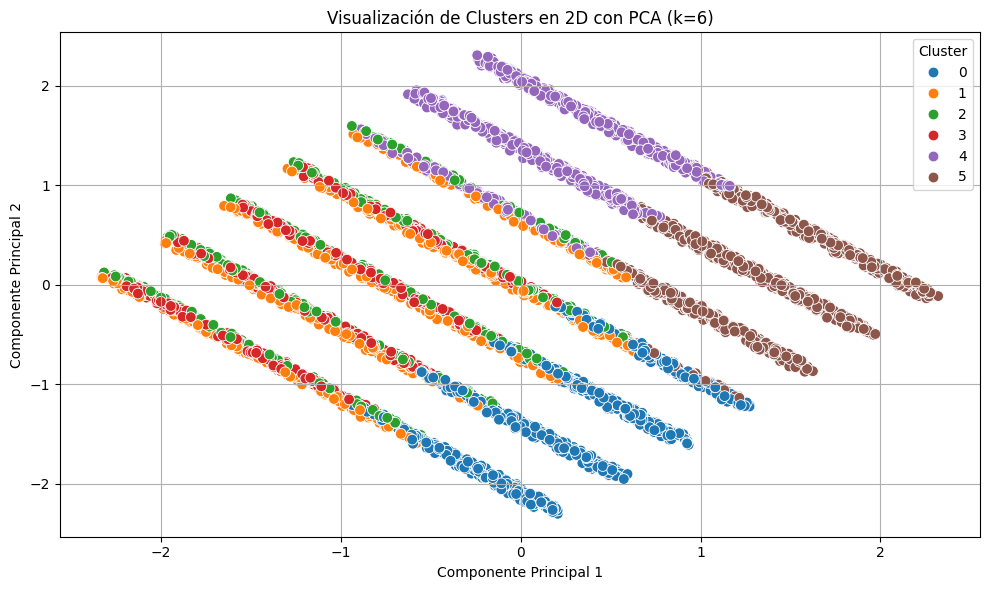


Cluster 0:
Country
Australia       101
China            65
India            61
Mexico           60
Canada           56
Spain            54
Turkey           53
Germany          51
Brazil           50
South Africa     50
Name: count, dtype: int64

Cluster 1:
Country
Australia      57
Germany        56
Brazil         43
India          42
UK             35
Turkey         35
France         35
Italy          35
Canada         32
South Korea    32
Name: count, dtype: int64

Cluster 2:
Country
Australia      55
China          40
Japan          39
Spain          38
South Korea    38
Russia         35
Germany        34
India          33
USA            32
Indonesia      29
Name: count, dtype: int64

Cluster 3:
Country
Australia       78
Spain           47
Japan           43
Turkey          42
Canada          42
Saudi Arabia    42
Germany         40
USA             39
China           39
France          38
Name: count, dtype: int64

Cluster 4:
Country
Australia    86
Italy        61
Turkey       5

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Copia de trabajo
df_scaled = df_encoded.copy()

# 2. Escalar solo las columnas numéricas
scaler = StandardScaler()
df_scaled[['Year_Label', 'Population_Label']] = scaler.fit_transform(df_scaled[['Year_Label', 'Population_Label']])

# 3. Entrenar modelo KMeans con k=6
X = df_scaled.values
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
df_scaled['Cluster'] = labels

# 4. Reducción de dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

# 5. Reconstruir columna de país desde one-hot
country_cols = [col for col in df_encoded.columns if col.startswith("Country_")]
df_scaled['Country'] = df_encoded[country_cols].idxmax(axis=1).str.replace("Country_", "")

# 6. Visualización de clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60)
plt.title("Visualización de Clusters en 2D con PCA (k=6)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Ver 10 países más frecuentes por cluster
for cluster_id in sorted(df_scaled['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    print(df_scaled[df_scaled['Cluster'] == cluster_id]['Country'].value_counts().head(10))


In [ ]:
# Copia de trabajo
df_describe = df_scaled.copy()

# Función auxiliar para reconstruir niveles desde columnas one-hot
def one_hot_to_label(df, prefix):
    cols = [col for col in df.columns if col.startswith(prefix)]
    return df[cols].idxmax(axis=1).str.replace(prefix, '')

# Reconstruir las variables categóricas
df_describe['Total_Waste_Nivel'] = one_hot_to_label(df_describe, 'Total Waste_')
df_describe['Economic_Loss_Nivel'] = one_hot_to_label(df_describe, 'Economic Loss_')
df_describe['Avg_Waste_Capita_Nivel'] = one_hot_to_label(df_describe, 'Avg Waste per Capita_')
df_describe['Household_Waste_Nivel'] = one_hot_to_label(df_describe, 'Household Waste_')

# Agrupar por cluster y obtener los niveles más frecuentes
resumen_categorico = df_describe.groupby('Cluster')[[
    'Total_Waste_Nivel',
    'Economic_Loss_Nivel',
    'Avg_Waste_Capita_Nivel',
    'Household_Waste_Nivel'
]].agg(lambda x: x.mode().iloc[0])

# Promedios de variables numéricas
resumen_numerico = df_describe.groupby('Cluster')[['Year_Label', 'Population_Label']].mean()

# Mostrar resultados
print("Niveles predominantes por cluster:\n")
print(resumen_categorico)

print("\nPromedios numéricos por cluster:\n")
print(resumen_numerico)


Niveles predominantes por cluster:

        Total_Waste_Nivel Economic_Loss_Nivel Avg_Waste_Capita_Nivel  \
Cluster                                                                
0                    Alto                Alto                   Alto   
1                   Medio               Medio                   Bajo   
2                    Bajo                Bajo                   Bajo   
3                 Extremo             Extremo                Extremo   
4                 Extremo             Extremo                   Alto   
5                    Bajo                Bajo                  Medio   

        Household_Waste_Nivel  
Cluster                        
0                     Extremo  
1                        Bajo  
2                       Medio  
3                        Bajo  
4                        Alto  
5                       Medio  

Promedios numéricos por cluster:

         Year_Label  Population_Label
Cluster                              
0         -0.803121 

/tmp/ipython-input-20-294544963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_describe, x='Cluster', order=sorted(df_describe['Cluster'].unique()), palette='tab10')


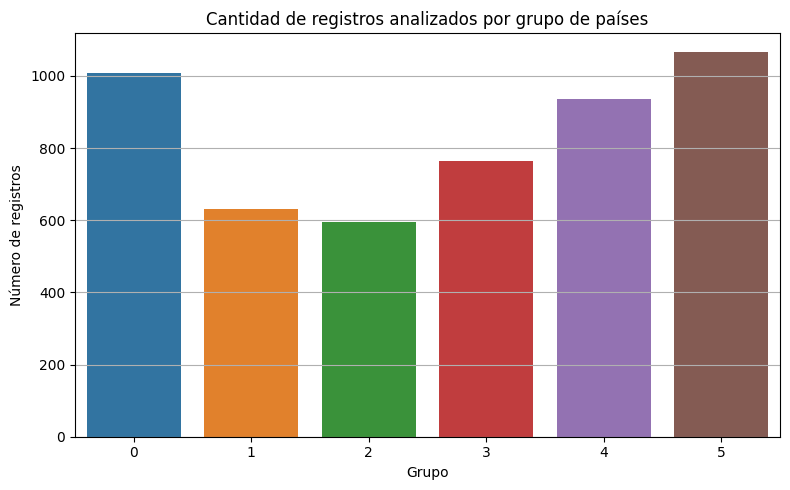

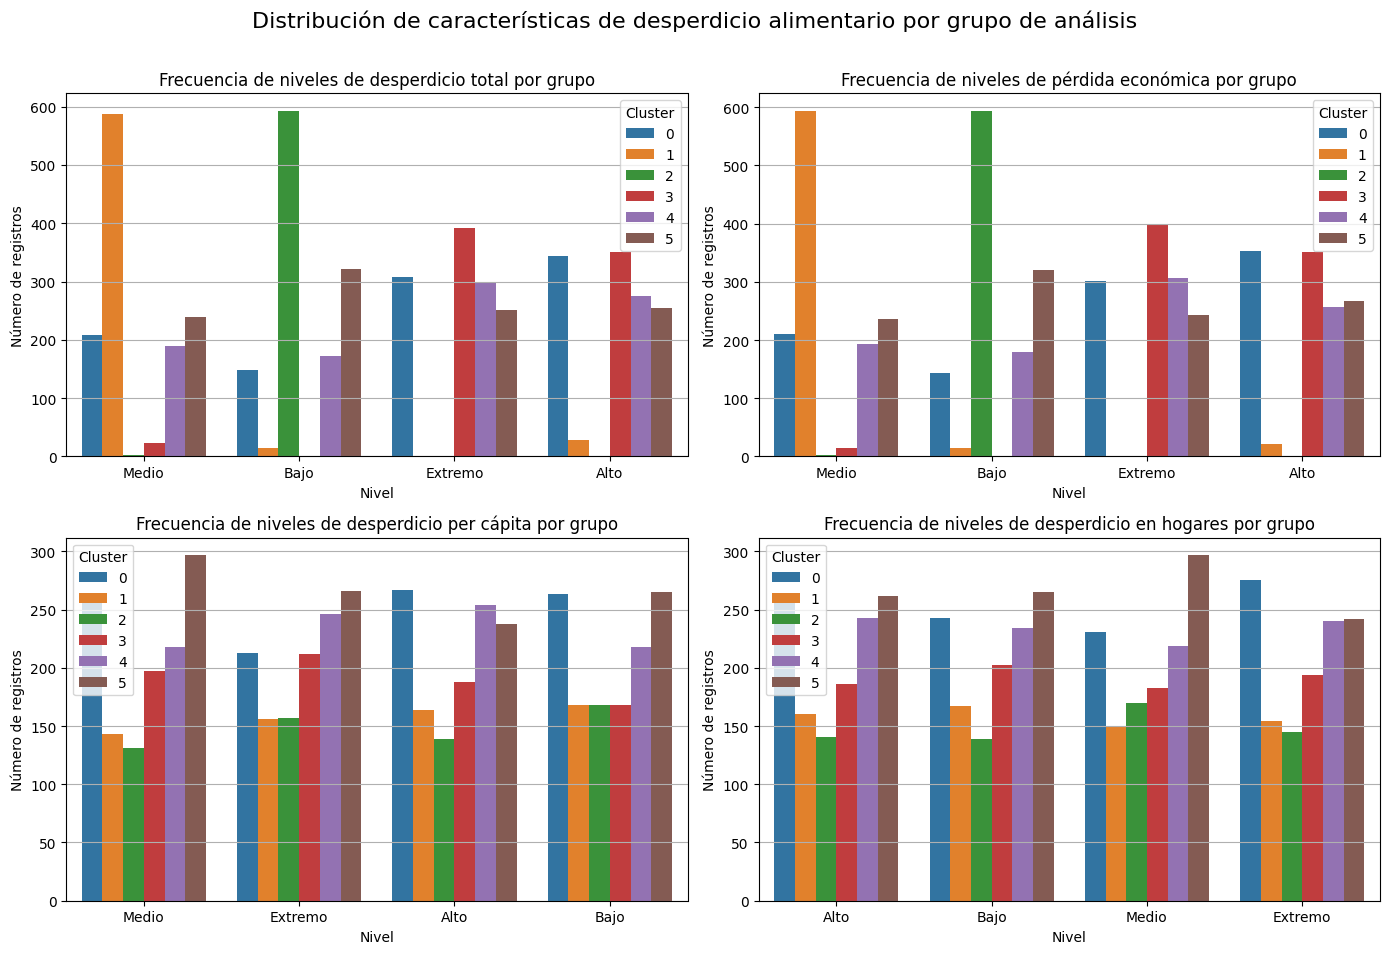

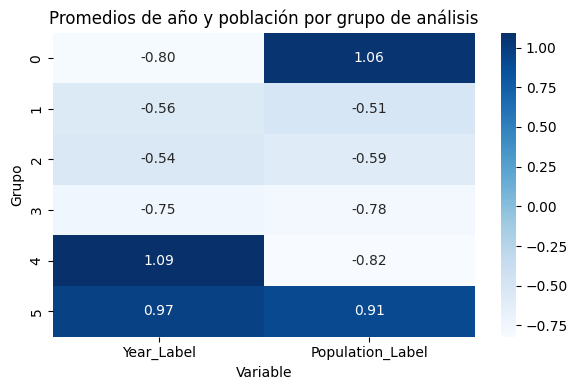

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cantidad de registros por grupo
plt.figure(figsize=(8, 5))
sns.countplot(data=df_describe, x='Cluster', order=sorted(df_describe['Cluster'].unique()), palette='tab10')
plt.title("Cantidad de registros analizados por grupo de países")
plt.xlabel("Grupo")
plt.ylabel("Número de registros")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Distribución de características por grupo (4 subgráficos)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df_describe, x='Total_Waste_Nivel', hue='Cluster', ax=axes[0,0], palette='tab10')
axes[0,0].set_title("Frecuencia de niveles de desperdicio total por grupo")
axes[0,0].set_xlabel("Nivel")
axes[0,0].set_ylabel("Número de registros")

sns.countplot(data=df_describe, x='Economic_Loss_Nivel', hue='Cluster', ax=axes[0,1], palette='tab10')
axes[0,1].set_title("Frecuencia de niveles de pérdida económica por grupo")
axes[0,1].set_xlabel("Nivel")
axes[0,1].set_ylabel("Número de registros")

sns.countplot(data=df_describe, x='Avg_Waste_Capita_Nivel', hue='Cluster', ax=axes[1,0], palette='tab10')
axes[1,0].set_title("Frecuencia de niveles de desperdicio per cápita por grupo")
axes[1,0].set_xlabel("Nivel")
axes[1,0].set_ylabel("Número de registros")

sns.countplot(data=df_describe, x='Household_Waste_Nivel', hue='Cluster', ax=axes[1,1], palette='tab10')
axes[1,1].set_title("Frecuencia de niveles de desperdicio en hogares por grupo")
axes[1,1].set_xlabel("Nivel")
axes[1,1].set_ylabel("Número de registros")

for ax in axes.flat:
    ax.grid(axis='y')

plt.suptitle("Distribución de características de desperdicio alimentario por grupo de análisis", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# 3. Promedios de año y población por grupo
numeric_means = df_describe.groupby('Cluster')[['Year_Label', 'Population_Label']].mean()

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_means, annot=True, fmt=".2f", cmap="Blues")
plt.title("Promedios de año y población por grupo de análisis")
plt.xlabel("Variable")
plt.ylabel("Grupo")
plt.tight_layout()
plt.show()


# Describe cada uno de los conglomerados que existen en tu set de Datos

Cluster 0: Países grandes con mucho desperdicio y pérdida económica, especialmente en los hogares.

Cluster 1: Países pequeños con niveles moderados de desperdicio y pérdidas, principalmente fuera del hogar.

Cluster 2: Países pequeños con bajo desperdicio y bajo impacto económico.

Cluster 3: Países con desperdicio extremo en todos los aspectos, aunque con poblaciones pequeñas.

Cluster 4: Países modernos con desperdicio extremo y fuerte impacto en hogares, pero poca población.

Cluster 5: Países grandes con pérdidas económicas bajas, pero desperdicio medio por persona.

# Indica 3 nuevos insights que se hayan encontrados al aplicar Kmeans

1. Existen países con bajo nivel económico que presentan niveles extremos de desperdicio: A pesar de tener poca población y baja pérdida monetaria, algunos países muestran un desperdicio per cápita muy alto, lo que sugiere ineficiencia en el consumo o la distribución de alimentos.

2. Algunos países altamente poblados tienen un desperdicio total elevado pero un impacto individual bajo: Esto indica que, aunque el volumen total es alto, el problema está bien distribuido entre la población, y las políticas pueden centrarse en sectores específicos como los hogares.

3. El desperdicio extremo en los hogares está concentrado en países con alto poder adquisitivo: Se identificaron conglomerados donde el desperdicio total, económico y en el hogar coincide, especialmente en países modernos, lo que indica un consumo excesivo y una baja conciencia de aprovechamiento.


In [ ]:
import joblib

# Asumiendo que ya tienes definidos:
# kmeans (modelo entrenado) y scaler (StandardScaler entrenado)

# Guardar el modelo KMeans
joblib.dump(kmeans, "modelo_entrenado.pkl")

# Guardar el scaler
joblib.dump(scaler, "scaler.pkl")

print("Modelos guardados correctamente.")


Modelos guardados correctamente.
